<a href="https://colab.research.google.com/github/ChutikarnJuntaramanee/Jupyter_Data_Visualization/blob/master/Mid207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Perform correlation analysis on PM2.5 data obtained from the provinces of Kanchanaburi, Rayong and Narathiwat. Display the correlation matrix using plasma colormap.

In [298]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [299]:
Kanchanaburi = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/kanchanaburi_pm25.csv')

In [300]:
Rayong = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/rayongmaptaphut_pm25.csv')

In [301]:
Narathiwat = pd.read_csv ('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/narathiwat_pm25.csv')

In [302]:
Kanchanaburi.head(10)

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0
5,2016,3,3,13,39.0,1,0
6,2016,3,3,14,30.1,1,0
7,2016,3,3,15,32.3,1,0
8,2016,3,3,16,32.0,1,0
9,2016,3,3,17,64.1,1,0


In [303]:
Kanchanaburi.drop(columns=['Year','Month','Day', 'UTC Hour', 'PM10_mask', 'Retrospective' ],inplace=True)
Kanchanaburi

,PM2.5
0,65.2
1,65.2
2,64.9
3,64.9
4,38.4
...,...
23803,35.0
23804,35.0
23805,42.0
23806,47.0


In [304]:
Kanchanaburi = Kanchanaburi.rename({'PM2.5': 'Kanchanaburi'}, axis=1)
Kanchanaburi

,Kanchanaburi
0,65.2
1,65.2
2,64.9
3,64.9
4,38.4
...,...
23803,35.0
23804,35.0
23805,42.0
23806,47.0


In [305]:
Rayong.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,40.6,1,0
1,2016,3,3,9,40.6,1,0
2,2016,3,3,10,40.6,1,0
3,2016,3,3,11,40.6,1,0
4,2016,3,3,12,38.7,1,0


In [306]:
Rayong.drop(columns=['Year','Month','Day', 'UTC Hour', 'PM10_mask', 'Retrospective' ],inplace=True)
Rayong

,PM2.5
0,40.6
1,40.6
2,40.6
3,40.6
4,38.7
...,...
23807,18.0
23808,27.0
23809,20.0
23810,29.0


In [307]:
Rayong = Rayong.rename({'PM2.5': 'Rayong'}, axis=1)
Rayong

,Rayong
0,40.6
1,40.6
2,40.6
3,40.6
4,38.7
...,...
23807,18.0
23808,27.0
23809,20.0
23810,29.0


In [308]:
Narathiwat.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [309]:
Narathiwat.drop(columns=['Year','Month','Day', 'UTC Hour', 'PM10_mask', 'Retrospective' ],inplace=True)
Narathiwat

,PM2.5
0,62.9
1,62.9
2,55.5
3,55.5
4,47.9
...,...
23810,15.0
23811,12.0
23812,12.0
23813,20.0


In [310]:
Narathiwat = Narathiwat.rename({'PM2.5': 'Narathiwat'}, axis=1)
Narathiwat

,Narathiwat
0,62.9
1,62.9
2,55.5
3,55.5
4,47.9
...,...
23810,15.0
23811,12.0
23812,12.0
23813,20.0


In [311]:
PM25 = pd.concat([Kanchanaburi, Rayong, Narathiwat], axis=1, sort=True)
PM25

,Kanchanaburi,Rayong,Narathiwat
0,65.2,40.6,62.9
1,65.2,40.6,62.9
2,64.9,40.6,55.5
3,64.9,40.6,55.5
4,38.4,38.7,47.9
...,...,...,...
23810,NaN,29.0,15.0
23811,NaN,22.0,12.0
23812,NaN,NaN,12.0
23813,NaN,NaN,20.0


In [312]:
PM25.corr()

,Kanchanaburi,Rayong,Narathiwat
Kanchanaburi,1.000000,0.665913,0.631500
Rayong,0.665913,1.000000,0.545193
Narathiwat,0.631500,0.545193,1.000000


In [313]:
correlat=PM25.corr()

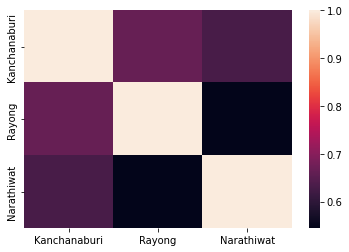

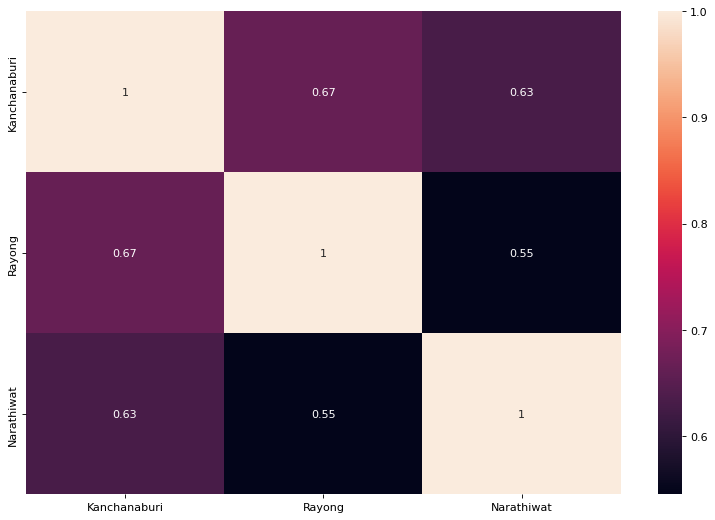

In [314]:
sns.heatmap(correlat)
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(correlat, annot=True)
plt.show()

2. Perform year-wise trend of line plot for all the data

In [315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys

In [316]:
Kanchanaburi = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/kanchanaburi_pm25.csv')
Kanchanaburi

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0
...,...,...,...,...,...,...,...
23803,2019,2,7,5,35.0,45,0
23804,2019,2,7,6,35.0,45,0
23805,2019,2,7,7,42.0,56,0
23806,2019,2,7,8,47.0,64,0


In [317]:
Kanchanaburi.rename(columns={'UTC Hour':'Hour'}, inplace=True)
Kanchanaburi.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0


In [318]:
Kanchanaburi['datetime'] = pd.to_datetime(Kanchanaburi[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
Kanchanaburi.index = Kanchanaburi['datetime']
Kanchanaburi.Hour = Kanchanaburi.index.hour # UTC hour to UTC+7
Kanchanaburi.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,65.2,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,65.2,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,64.9,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,64.9,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,38.4,1,0,2016-03-03 19:00:00


(23808, 5)

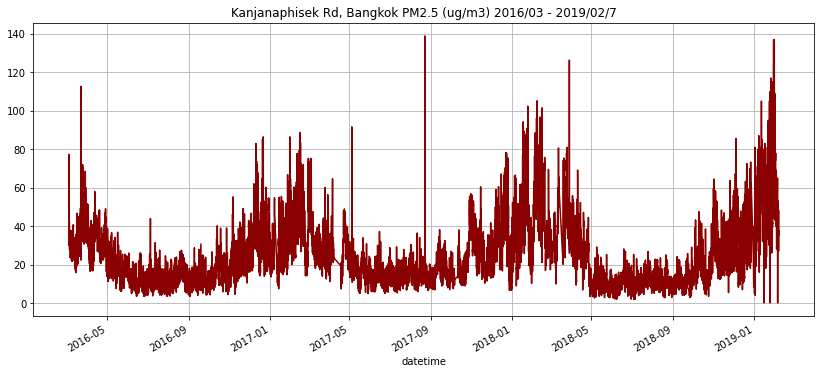

In [319]:
Kanchanaburi.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
Kanchanaburi['PM2.5'].plot(figsize=(14,6),title="Kanjanaphisek Rd, Bangkok PM2.5 (ug/m3) 2016/03 - 2019/02/7", color='darkred', grid=True)
Kanchanaburi.shape

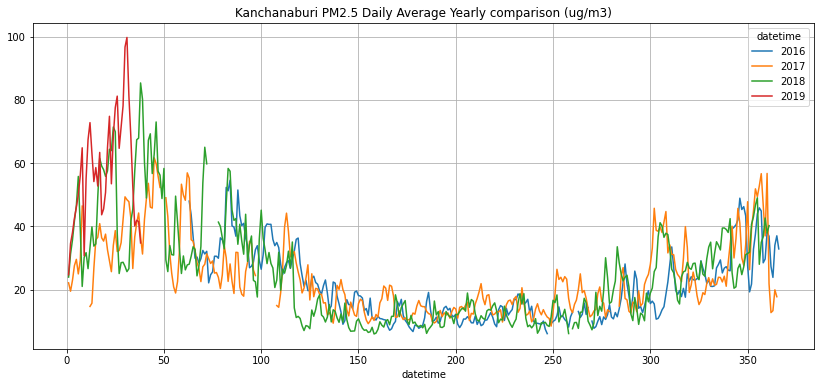

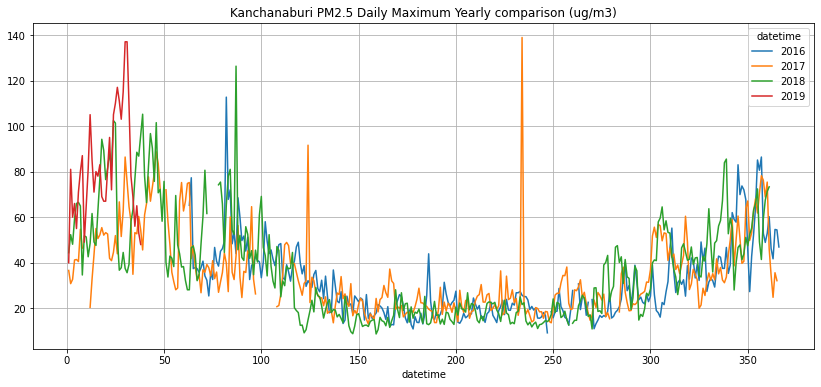

In [320]:
pv_Kanchanaburi = pd.pivot_table(Kanchanaburi, index=Kanchanaburi.index.dayofyear, columns=Kanchanaburi.index.year, values='PM2.5', aggfunc='mean')
pv_Kanchanaburi.plot(title="Kanchanaburi PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2_Kanchanaburi = pd.pivot_table(Kanchanaburi, index=Kanchanaburi.index.dayofyear, columns=Kanchanaburi.index.year, values='PM2.5', aggfunc='max')
pv2_Kanchanaburi.plot(title="Kanchanaburi PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [321]:
Rayong = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/rayongmaptaphut_pm25.csv')
Rayong

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,40.6,1,0
1,2016,3,3,9,40.6,1,0
2,2016,3,3,10,40.6,1,0
3,2016,3,3,11,40.6,1,0
4,2016,3,3,12,38.7,1,0
...,...,...,...,...,...,...,...
23807,2019,2,7,5,18.0,40,0
23808,2019,2,7,6,27.0,42,0
23809,2019,2,7,7,20.0,37,0
23810,2019,2,7,8,29.0,34,0


In [322]:
Rayong.rename(columns={'UTC Hour':'Hour'}, inplace=True)
Rayong.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,40.6,1,0
1,2016,3,3,9,40.6,1,0
2,2016,3,3,10,40.6,1,0
3,2016,3,3,11,40.6,1,0
4,2016,3,3,12,38.7,1,0


In [323]:
Rayong['datetime'] = pd.to_datetime(Rayong[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
Rayong.index = Rayong['datetime']
Rayong.Hour = Rayong.index.hour # UTC hour to UTC+7
Rayong.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,40.6,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,40.6,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,40.6,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,40.6,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,38.7,1,0,2016-03-03 19:00:00


(23812, 5)

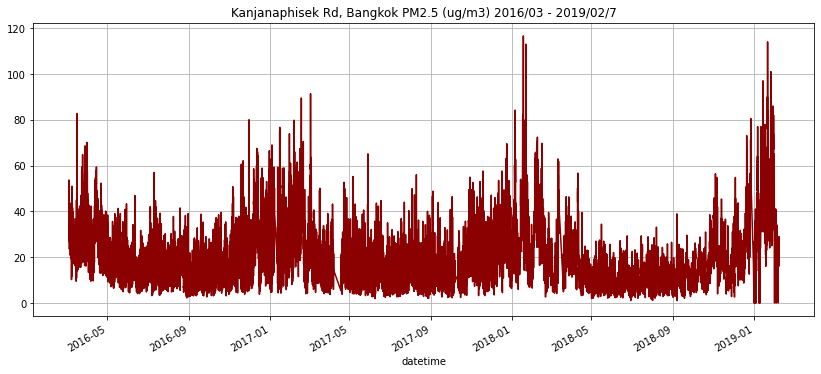

In [324]:
Rayong.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
Rayong['PM2.5'].plot(figsize=(14,6),title="Kanjanaphisek Rd, Bangkok PM2.5 (ug/m3) 2016/03 - 2019/02/7", color='darkred', grid=True)
Rayong.shape

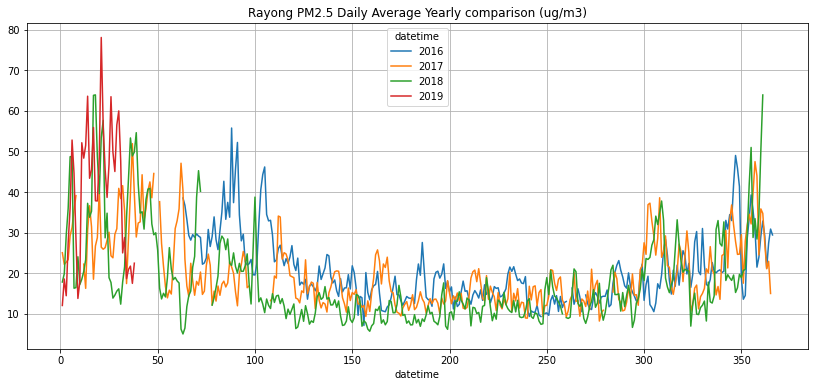

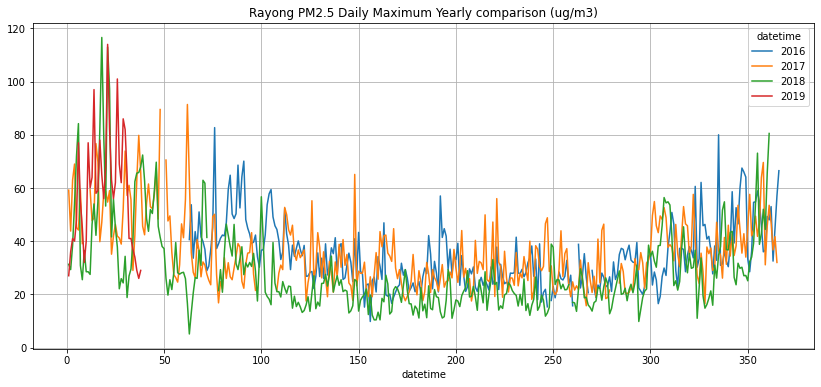

In [325]:
pv_Rayong = pd.pivot_table(Rayong, index=Rayong.index.dayofyear, columns=Rayong.index.year, values='PM2.5', aggfunc='mean')
pv_Rayong.plot(title="Rayong PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2_Rayong = pd.pivot_table(Rayong, index=Rayong.index.dayofyear, columns=Rayong.index.year, values='PM2.5', aggfunc='max')
pv2_Rayong.plot(title="Rayong PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [326]:
Narathiwat = pd.read_csv ('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/narathiwat_pm25.csv')
Narathiwat

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0
...,...,...,...,...,...,...,...
23810,2019,2,7,5,15.0,21,0
23811,2019,2,7,6,12.0,24,0
23812,2019,2,7,7,12.0,26,0
23813,2019,2,7,8,20.0,29,0


In [327]:
Narathiwat.rename(columns={'UTC Hour':'Hour'}, inplace=True)
Narathiwat.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [328]:
Narathiwat['datetime'] = pd.to_datetime(Narathiwat[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
Narathiwat.index = Narathiwat['datetime']
Narathiwat.Hour = Narathiwat.index.hour # UTC hour to UTC+7
Narathiwat.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,62.9,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,55.5,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,55.5,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,47.9,1,0,2016-03-03 19:00:00


(23815, 5)

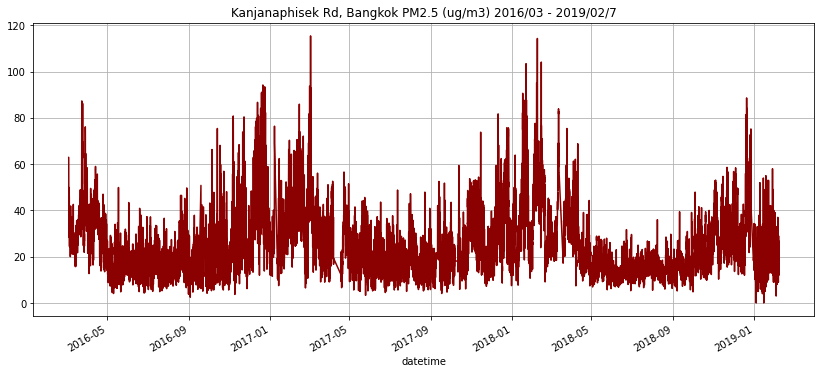

In [329]:
Narathiwat.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
Narathiwat['PM2.5'].plot(figsize=(14,6),title="Kanjanaphisek Rd, Bangkok PM2.5 (ug/m3) 2016/03 - 2019/02/7", color='darkred', grid=True)
Narathiwat.shape

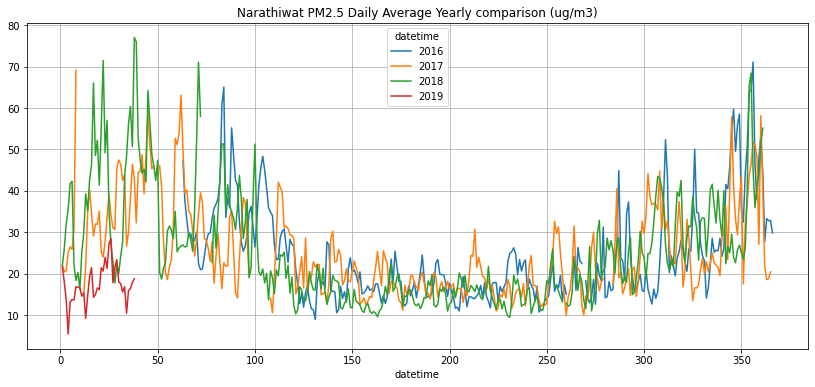

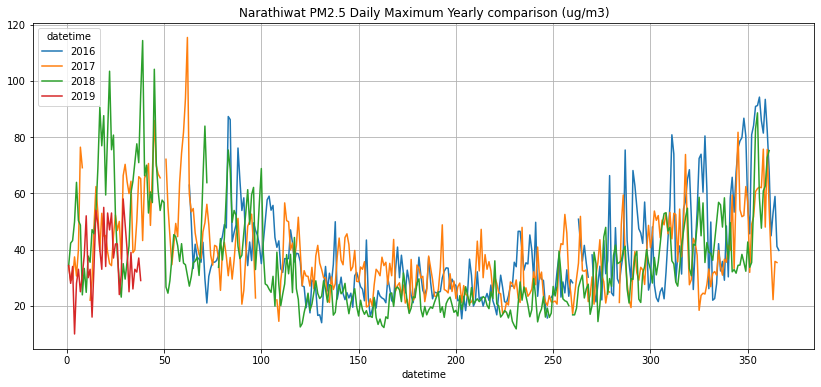

In [330]:
pv_Narathiwat = pd.pivot_table(Narathiwat, index=Narathiwat.index.dayofyear, columns=Narathiwat.index.year, values='PM2.5', aggfunc='mean')
pv_Narathiwat.plot(title="Narathiwat PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2_Narathiwat = pd.pivot_table(Narathiwat, index=Narathiwat.index.dayofyear, columns=Narathiwat.index.year, values='PM2.5', aggfunc='max')
pv2_Narathiwat.plot(title="Narathiwat PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

3. Display a pie chart with explosion on any of the data with 0-50 as normal 50-100 moderate and 100+ for abnormal

In [331]:
# Pie chart
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys

In [332]:
Kanchanaburi = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/kanchanaburi_pm25.csv')
Rayong = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/rayongmaptaphut_pm25.csv')
Narathiwat = pd.read_csv ('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/narathiwat_pm25.csv')

In [333]:
Kanchanaburi['PM2.5'].describe()
# 0- 50
# 50-100
# 100-150

count    23808.000000
mean        24.297442
std         16.734309
min          0.000000
25%         12.100000
50%         19.400000
75%         31.800000
max        138.900000
Name: PM2.5, dtype: float64

In [334]:
Kanchanaburi_cut_labels = ['Normal', "Moderate", 'Abnormal']
Kanchanaburi_cut_bins =[0, 50, 100, 150]
Kanchanaburi['Group'] = pd.cut(Kanchanaburi['PM2.5'], bins=Kanchanaburi_cut_bins, labels = Kanchanaburi_cut_labels)

In [335]:
Kanchanaburi.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective,Group
0,2016,3,3,8,65.2,1,0,Moderate
1,2016,3,3,9,65.2,1,0,Moderate
2,2016,3,3,10,64.9,1,0,Moderate
3,2016,3,3,11,64.9,1,0,Moderate
4,2016,3,3,12,38.4,1,0,Normal


In [345]:
Kanchanaburi.drop(columns=['Year','Month','Day', 'UTC Hour', 'PM10_mask', 'Retrospective' ],inplace=True)
Kanchanaburi

,PM2.5,Group
0,65.2,Moderate
1,65.2,Moderate
2,64.9,Moderate
3,64.9,Moderate
4,38.4,Normal
...,...,...
23803,35.0,Normal
23804,35.0,Normal
23805,42.0,Normal
23806,47.0,Normal


In [354]:
# Pie chart
labels = ['Normal', 'Moderate', 'Abnormal']

In [355]:
pie = pd.cut(Kanchanaburi['PM2.5'], 3, labels = labels).value_counts()

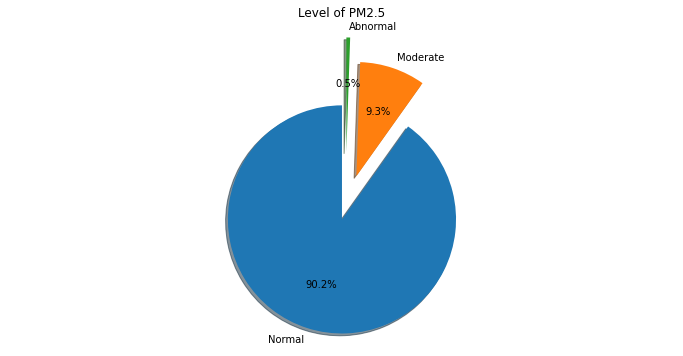

In [356]:
# Explode
explode = (0.1, 0.3, 0.5)

fig, ax = plt.subplots(figsize = (12,6))
ax.pie(pie,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Level of PM2.5')


plt.show()

In [357]:
#Rayong
Rayong['PM2.5'].describe()
# 0- 50
# 50-100
# 100-150

count    23812.000000
mean        20.072153
std         12.836449
min          0.000000
25%         11.100000
50%         16.900000
75%         25.700000
max        116.600000
Name: PM2.5, dtype: float64

In [358]:
cut_labels = ['Normal', "Moderate", 'Abnormal']
cut_bins =[0, 50, 100, 150]
Rayong['Group'] = pd.cut(Rayong['PM2.5'], bins=cut_bins, labels = cut_labels)

In [359]:
Rayong.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective,Group
0,2016,3,3,8,40.6,1,0,Normal
1,2016,3,3,9,40.6,1,0,Normal
2,2016,3,3,10,40.6,1,0,Normal
3,2016,3,3,11,40.6,1,0,Normal
4,2016,3,3,12,38.7,1,0,Normal


In [362]:
# Pie chart
labels = ['Normal', 'Moderate', 'Abnormal']

In [365]:
pie = pd.cut(Rayong['PM2.5'], 3, labels = labels).value_counts()

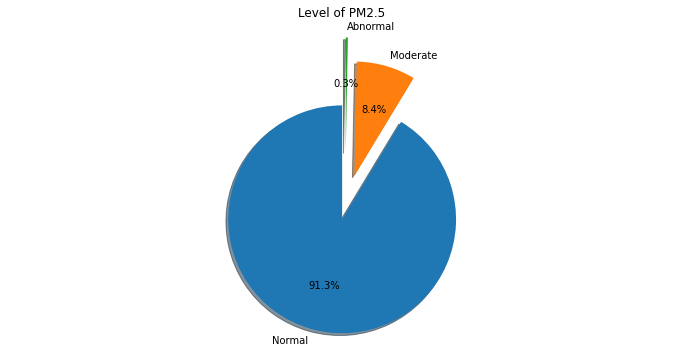

In [366]:
# Explode
explode = (0.1, 0.3, 0.5)

fig, ax = plt.subplots(figsize = (12,6))
ax.pie(pie,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Level of PM2.5')


plt.show()

In [367]:
#Narathiwat
Narathiwat['PM2.5'].describe()
# 0- 50
# 50-100
# 100-150

count    23815.000000
mean        24.595347
std         13.573874
min          0.000000
25%         14.900000
50%         21.000000
75%         30.900000
max        115.400000
Name: PM2.5, dtype: float64

In [369]:
cut_labels = ['Normal', "Moderate", 'Abnormal']
cut_bins =[0, 50, 100, 150]
Narathiwat['Group'] = pd.cut(Rayong['PM2.5'], bins=cut_bins, labels = cut_labels)

In [370]:
Narathiwat.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective,Group
0,2016,3,3,8,62.9,1,0,Normal
1,2016,3,3,9,62.9,1,0,Normal
2,2016,3,3,10,55.5,1,0,Normal
3,2016,3,3,11,55.5,1,0,Normal
4,2016,3,3,12,47.9,1,0,Normal


In [371]:
# Pie chart
labels = ['Normal', 'Moderate', 'Abnormal']

In [379]:
pie = pd.cut(Narathiwat['PM2.5'], 3, labels = labels).value_counts()

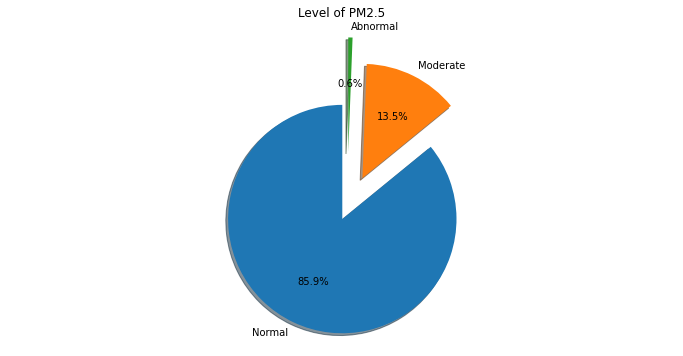

In [380]:
# Explode
explode = (0.1, 0.3, 0.5)

fig, ax = plt.subplots(figsize = (12,6))
ax.pie(pie,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Level of PM2.5')


plt.show()